# Вычисление всех темпераментов

In [1]:
import sys
sys.path.append("../../")

In [2]:
import warnings
import pingouin as pg
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import pickle
import json
import numpy as np
import random
import itertools as it
from collections import Counter
from tqdm import tqdm
from analytics_lib.nlp_texts.psychotype import dict_with_psychotype_by_text, dict_norm, dict_norm_cheb, dict_with_temp_by_text

/Users/mac-os/Documents/Work/bortnik_psychometry/bortnik/lib/python3.9/site-packages/outdated/utils.py:14: OutdatedPackageWarning: The package pingouin is out of date. Your version is 0.3.11, the latest is 0.5.3.
Set the environment variable OUTDATED_IGNORE=1 to disable these warnings.
  return warn(


In [6]:
def temp_by_text(text, list_features):
    df_merge_slice = df_merge[['Текст'] + list_features]
    dict_n = dict_norm_cheb(dict_with_temp_by_text(text, df_merge_slice, df_merge_slice, df_merge_slice, df_merge_slice))
    for psych in ["Меланхолик", "Холерик", "Флегматик", "Сангвиник"]:
        if not dict_n.get(psych):
            dict_n[psych] = 0
    return dict_n

def portion_values_in_range(list_feature_values, min_bound, max_bound):
    return ((list_feature_values < max_bound) & (list_feature_values >= min_bound)).sum() / len(list_feature_values)

def plot_one(public_df):
    list_of_text_features = public_df._get_numeric_data().columns.values.tolist()
    list_of_text_features.reverse()
    n = len(list_of_text_features)
    #plt.rcParams["figure.figsize"] = (18,n)
    plt.rcParams["figure.figsize"] = (22, n)
    pal = sns.cubehelix_palette(10, rot=-.25, light=.7)
    fig, ax = plt.subplots((n // 2 + n % 2), 2)
    for i in range(n // 2 + n % 2):
        for j in range(2):
            try:
                feature_name = list_of_text_features.pop()
            except:
                break
            #feature_value = person_public_df[person_public_df["Текст"] == text][feature_name].values[0]
            #num, rang, psyh = size_range_psyh_of_feature_value(text, feature_name, person_public_df, public_df)
            x = public_df[f"{feature_name}"].to_list()
            sns.kdeplot(data=x, fill = True, ax = ax[i][j], palette = pal, cut = 0)
            ax[i][j].set_title(f"{feature_name}", y=1.0, pad=-14, fontsize=16)
            ax[i][j].set_xlabel(f'Значение признака', fontsize=13)
            ax[i][j].set_ylabel(f'Доля людей', fontsize=13)
            ax[i][j].axvline(x=np.quantile(x, q=0.2), c='yellow')
            ax[i][j].axvline(x=np.quantile(x, q=0.4), c='green')
            ax[i][j].axvline(x=np.quantile(x, q=0.6), c='blue')
            ax[i][j].axvline(x=np.quantile(x, q=0.8), c='red')
            #ax[i][j].axvline(x=feature_value, label=f'{num} = {feature_value}\n{psyh}', c='red')

            #ax[i][j].legend(fontsize = 12, loc='right')
    fig.tight_layout()
    plt.show()

## Палитра

* 20% квантиль - вертикальная линия жёлтого цвета
* 40% квантиль - вертикальная линия зелёный цвета
* 60% квантиль (медиана) - вертикальная линия синего цвета
* 80% квантиль - вертикальная линия красный цвета

In [4]:
# PATH = '../data/update_dataframes'
# public_df = pd.read_pickle(f"{PATH}/public_df.pkl")
# df_merge = public_df
# list_of_texts = list(df_merge["Текст"])
# list_of_features = list(df_merge._get_numeric_data().columns)
# ind = 1
# statistics = []

# for text in tqdm(list_of_texts):
#     statistics.append({})
#     statistics[ind-1]['Текст'] = text
#     dict_psych = temp_by_text(text, list_of_features)
#     for psych in dict_psych.keys():
#         statistics[ind-1][psych] = dict_psych[psych]
#     ind += 1
    
# df_statistics = pd.DataFrame(statistics)   
# list_psych = ["Меланхолик", "Холерик", "Флегматик", "Сангвиник"]
# df_statistics['count_max'] = (df_statistics[list_psych] == 1.00).sum(axis=1)
# df_statistics['psych_max'] = df_statistics[list_psych].idxmax(axis=1)
# part = df_statistics['count_max'].value_counts(1)[1] # доля однозначно определенных психотипов
# print(f"Доля однозначно определенных темпераментов: {part}")

# df_statistics.to_pickle("../data/df_temp_all.pkl")
## Доля однозначно определенных психотипов: 0.79

100%|█████████████████████████████████████████████████████████████████████████████████| 2678/2678 [27:17<00:00,  1.64it/s]

Доля однозначно определенных психотипов: 0.7453323375653472


In [8]:
PATH = '../data/update_dataframes'
public_df = pd.read_pickle(f"{PATH}/public_df.pkl")
public_semantic_role_df = pd.read_pickle(f"{PATH}/public_semantic_role_df.pkl")
morph_df = pd.read_pickle(f"{PATH}/morph_df.pkl")
df_merge1 = public_df.merge(public_semantic_role_df, left_on='Текст', right_on='Текст', how='inner', suffixes=('_p','_sr'), indicator = True).sort_values(by=['_merge'], ascending = False, ignore_index = True)
print(df_merge1["_merge"].value_counts())
df_merge1 = df_merge1.drop("_merge", axis=1)
df_merge = df_merge1.merge(morph_df, left_on='Текст', right_on='Текст', how='inner', suffixes=('_m','_v'), indicator = True).sort_values(by=['_merge'], ascending = False, ignore_index = True)
print(df_merge["_merge"].value_counts())
df_merge = df_merge.drop("_merge", axis=1)

df_psych_all = pd.read_pickle("../data/df_temp_all.pkl")
list_psych = ["Меланхолик", "Холерик", "Флегматик", "Сангвиник"]

both          2677
left_only        0
right_only       0
Name: _merge, dtype: int64
both          2677
left_only        0
right_only       0
Name: _merge, dtype: int64


/Users/mac-os/Documents/Work/bortnik_psychometry/bortnik/lib/python3.9/site-packages/seaborn/distributions.py:316: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  warnings.warn(msg, UserWarning)


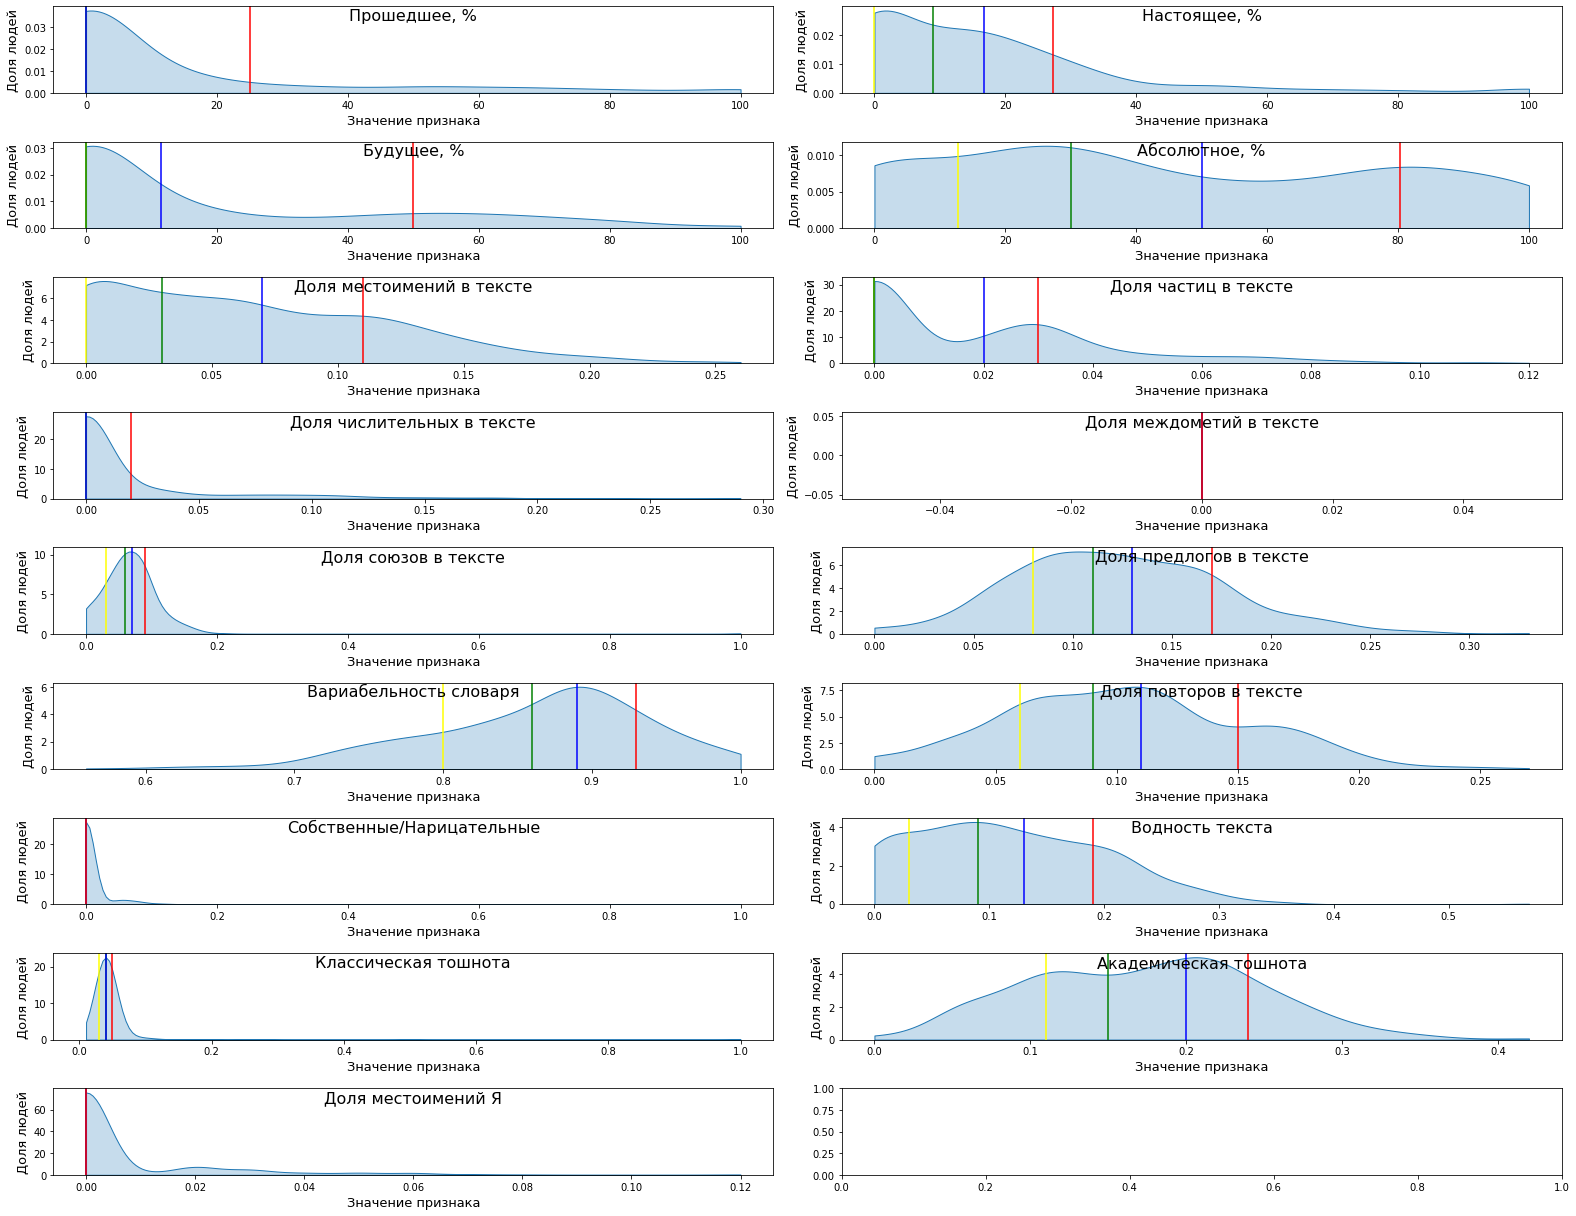

In [7]:
# Но это не тоже самое, что распределение признака по всей выборке (это лишь в разрезе конкртеного психотипа)
psych = 'Сангвиник'
list_texts_psych = list(df_psych_all[(df_psych_all.count_max == 1) & (df_psych_all.psych_max == psych)]["Текст"])
#list_of_features = ["Доля местоимений в тексте", "Доля частиц в тексте", "Доля предлогов в тексте", "Доля союзов в тексте"]
list_of_features = ['Прошедшее, %', 'Настоящее, %', 'Будущее, %', 'Абсолютное, %',\
                    'Доля местоимений в тексте', 'Доля частиц в тексте', 'Доля числительных в тексте',\
                    'Доля междометий в тексте', 'Доля союзов в тексте','Доля предлогов в тексте',\
                    'Вариабельность словаря', 'Доля повторов в тексте', 'Собственные/Нарицательные',\
                    'Водность текста', 'Классическая тошнота', 'Академическая тошнота',  'Доля местоимений Я']
df_psych = df_merge[df_merge['Текст'].isin(list_texts_psych)][list_of_features]
plot_one(df_psych)

In [9]:
# Доля местоимений в тексте
#feature_name = list_of_features[0]
#psych = list_psych[0]

for psych in list_psych:
    list_texts_psych = list(df_psych_all[(df_psych_all.count_max == 1) & (df_psych_all.psych_max == psych)]["Текст"])
    list_of_features = ["Доля местоимений в тексте", "Доля частиц в тексте", "Доля предлогов в тексте", "Доля союзов в тексте"]
    df_psych = df_merge[df_merge['Текст'].isin(list_texts_psych)][list_of_features]

    for feature_name in list_of_features:
        list_feature_values_all = np.array(df_merge[feature_name])
        list_feature_values = np.array(df_psych[feature_name])
        
        q_0 = np.quantile(list_feature_values_all, q=0)
        q_20 = np.quantile(list_feature_values_all, q=0.2)
        q_40 = np.quantile(list_feature_values_all, q=0.4)
        q_60 = np.quantile(list_feature_values_all, q=0.6)
        q_80 = np.quantile(list_feature_values_all, q=0.8)
        q_100 = np.quantile(list_feature_values_all, q=1)

        list_tuples_ranges = [(q_0, q_20, "Мало"), (q_20, q_40, "Меньше среднего"), (q_40, q_60, "Средне"), (q_60, q_80, "Больше среднего"), (q_80, q_100, "Много")]
        print("")
        for tuple_range in list_tuples_ranges:
            print(f"Доля текстов для темперамента {psych} со значениями признака \n\"{feature_name}\" в интервале \"{tuple_range[2]}\" {tuple_range[:2]}: {round(portion_values_in_range(list_feature_values, tuple_range[0], tuple_range[1]), 4)}\n")
        print("\n\n")
    print("\n\n\n\n")


Доля текстов для темперамента Меланхолик со значениями признака 
"Доля местоимений в тексте" в интервале "Мало" (0.0, 0.02): 0.1473

Доля текстов для темперамента Меланхолик со значениями признака 
"Доля местоимений в тексте" в интервале "Меньше среднего" (0.02, 0.04): 0.1618

Доля текстов для темперамента Меланхолик со значениями признака 
"Доля местоимений в тексте" в интервале "Средне" (0.04, 0.07): 0.3454

Доля текстов для темперамента Меланхолик со значениями признака 
"Доля местоимений в тексте" в интервале "Больше среднего" (0.07, 0.1): 0.2271

Доля текстов для темперамента Меланхолик со значениями признака 
"Доля местоимений в тексте" в интервале "Много" (0.1, 0.5): 0.1184





Доля текстов для темперамента Меланхолик со значениями признака 
"Доля частиц в тексте" в интервале "Мало" (0.0, 0.0): 0.0

Доля текстов для темперамента Меланхолик со значениями признака 
"Доля частиц в тексте" в интервале "Меньше среднего" (0.0, 0.0): 0.0

Доля текстов для темперамента Меланхолик со з

In [13]:
# Доля местоимений в тексте
#feature_name = list_of_features[0]
#psych = list_psych[0]
list_of_features = ['Прошедшее, %', 'Настоящее, %', 'Будущее, %', 'Абсолютное, %',\
                    'Доля местоимений в тексте', 'Доля частиц в тексте', 'Доля числительных в тексте',\
                    'Доля междометий в тексте', 'Доля союзов в тексте','Доля предлогов в тексте',\
                    'Вариабельность словаря', 'Доля повторов в тексте', 'Собственные/Нарицательные',\
                    'Водность текста', 'Классическая тошнота', 'Академическая тошнота',  'Доля местоимений Я']
ind = 1
statistics = []
for psych in list_psych:
    list_texts_psych = list(df_psych_all[(df_psych_all.count_max == 1) & (df_psych_all.psych_max == psych)]["Текст"])
    #list_of_features = ["Доля местоимений в тексте", "Доля частиц в тексте", "Доля предлогов в тексте", "Доля союзов в тексте"]
    df_psych = df_merge[df_merge['Текст'].isin(list_texts_psych)][list_of_features]

    for feature_name in list_of_features:
        statistics.append({})
        statistics[ind-1]['Психотип'] = psych
        statistics[ind-1]['Признак'] = feature_name
        list_feature_values_all = np.array(df_merge[feature_name])
        list_feature_values = np.array(df_psych[feature_name])
        
        q_0 = np.quantile(list_feature_values_all, q=0)
        q_20 = np.quantile(list_feature_values_all, q=0.2)
        q_40 = np.quantile(list_feature_values_all, q=0.4)
        q_60 = np.quantile(list_feature_values_all, q=0.6)
        q_80 = np.quantile(list_feature_values_all, q=0.8)
        q_100 = np.quantile(list_feature_values_all, q=1)
        
        statistics[ind-1]['Квантили'] = np.round([q_0, q_20, q_40, q_60, q_80, q_100], 2)

        list_tuples_ranges = [(q_0, q_20, "Мало"), (q_20, q_40, "Меньше среднего"),\
                              (q_40, q_60, "Средне"), (q_60, q_80, "Больше среднего"), (q_80, q_100, "Много")]
        for tuple_range in list_tuples_ranges:
            statistics[ind-1][tuple_range[2]] = round(portion_values_in_range(list_feature_values,\
                                                                              tuple_range[0], tuple_range[1]), 2)
        ind += 1
        
df_distribution = pd.DataFrame(statistics)

threshold = 0.6
list_ranges = ['Мало', 'Меньше среднего', 'Средне', "Больше среднего", "Много"]
df_distribution = df_distribution[(df_distribution["Мало"] < 1) & (df_distribution["Меньше среднего"] < 1) & (df_distribution["Больше среднего"] < 1) & \
                (df_distribution["Средне"] < 1) & (df_distribution["Много"] < 1)]
df_distribution[f'count > {threshold}'] = (df_distribution[list_ranges] >= threshold).sum(axis=1)
df_distribution['Интервал'] = df_distribution[list_ranges].idxmax(axis=1)
df_distribution[df_distribution[f'count > {threshold}'] > 0]\
                                        .drop(f'count > {threshold}', axis=1)[["Признак", "Психотип", "Интервал"]]\
                                        .sort_values("Признак").reset_index(drop=True)

,Признак,Психотип,Интервал
0,"Будущее, %",Меланхолик,Средне
1,"Будущее, %",Холерик,Средне
2,Доля числительных в тексте,Меланхолик,Больше среднего
3,Доля числительных в тексте,Холерик,Больше среднего
4,Доля числительных в тексте,Флегматик,Больше среднего
5,Доля числительных в тексте,Сангвиник,Больше среднего
6,"Прошедшее, %",Флегматик,Средне
7,"Прошедшее, %",Сангвиник,Средне
